# Importing libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [2]:
#Loading data
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [6]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [8]:
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [9]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No missing values

In [12]:
df[['sex','smoker','day','time']] = df[['sex','smoker','day','time']].astype(str)

In [13]:
df.describe(include='O')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Insights

1. Gender
- There are two unique values for gender: “Male” and “Female.
- The most frequent gender in the dataset is male (157 occurrences).
- This suggests that the dataset has a higher representation of male customers.
2. Smoking Status
- There are two unique values for smoking status: “Yes” (smoker) and “No” (non-smoker).
- The majority of customers are non-smokers (151 occurrences).
3. Day of the Week:
- There are four unique values for the day of the week: “Thur” (Thursday), “Fri” (Friday), “Sat” (Saturday), and “Sun” (Sunday).
- The most frequent day is Saturday (87 occurrences).
- Saturday seems to be a popular day for dining out, based on the dataset.
4. Time of Day:
- There are two unique values for the time of day: “Lunch” and “Dinner.”
- The majority of tips were recorded during dinner service (176 occurrences).
- Dinner appears to be the primary mealtime when customers leave tips.

In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Insights

 1. Total Bill Distribution
    - The average total bill amount is approximately 19.79
    - The minimum total bill recorded is  3.07,while the maximum is 50.81
 2. Tip amount distribution
    - The average tip given is around $2.99
    - The smallest tip recorded is 1.0 and the largest tip is 10.0
3.  Party size(no of people)
    - The average party size is approximately 2.57
    - The smallest party consists of one person, while the largest party has six people
    - Most parties fall within the range of 2 to 3 people

# Univariate Analysis

<Axes: ylabel='Frequency'>

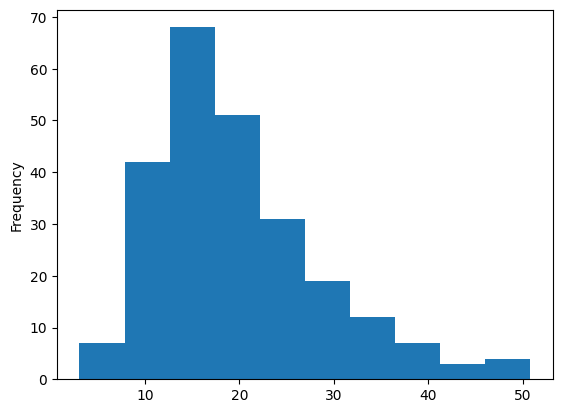

In [15]:
df['total_bill'].plot(kind='hist')

<Axes: ylabel='Frequency'>

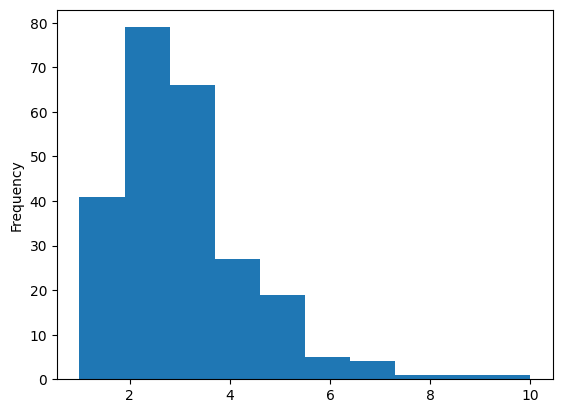

In [16]:
df['tip'].plot(kind='hist')

<Axes: xlabel='sex'>

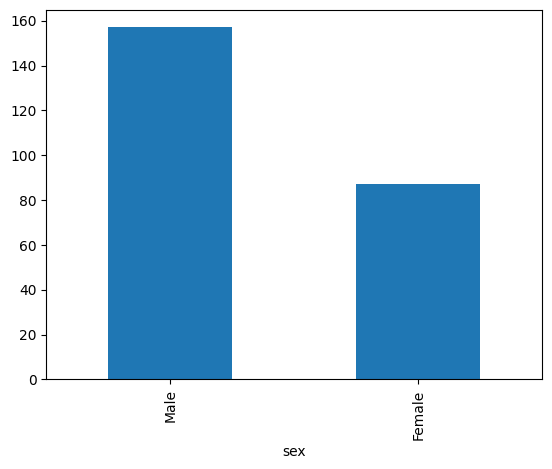

In [17]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

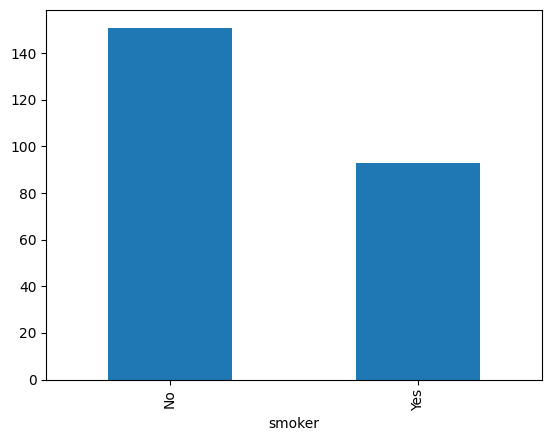

In [18]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='time'>

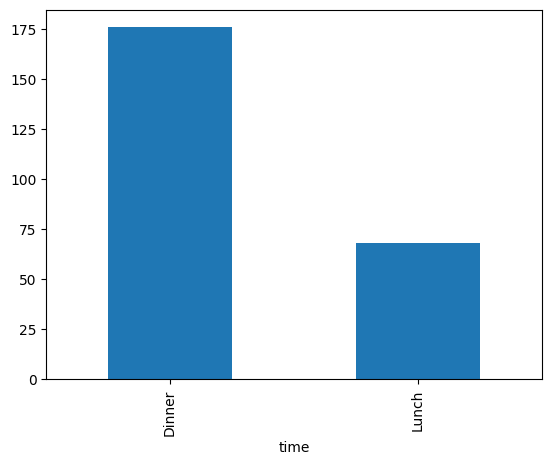

In [19]:
df['time'].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

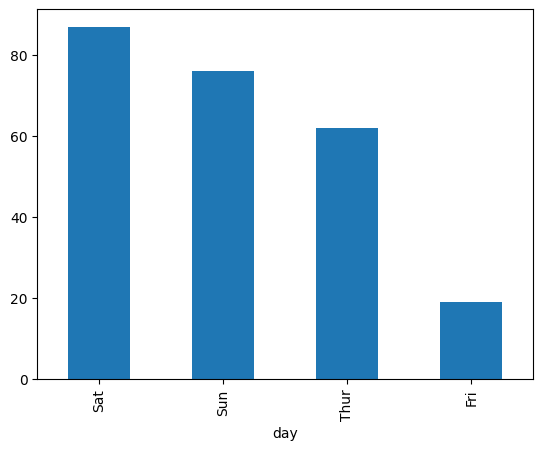

In [20]:
df['day'].value_counts().plot(kind='bar')

# Bivariate Analysis

<Axes: xlabel='total_bill', ylabel='tip'>

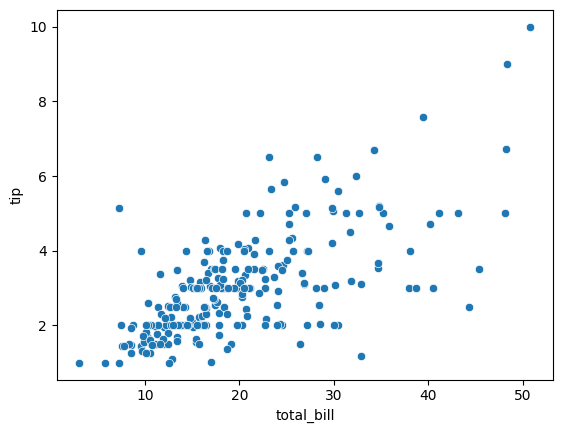

In [21]:
sns.scatterplot(data=df,x="total_bill",y="tip")

- The data points are scattered across the plot, but there’s a noticeable trend.
- As the total bill increases (moving right along the x-axis), the tip amount tends to increase as well (moving up along the y-axis).
- This positive correlation suggests that customers generally leave higher tips when they spend more on their meals.


<Axes: xlabel='sex'>

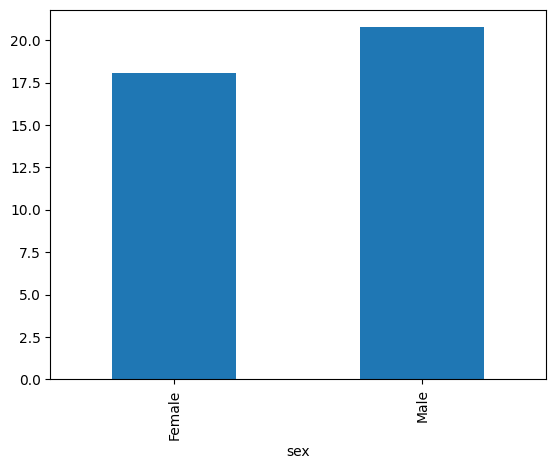

In [22]:
#Total bill distribution between Male & Female
df.groupby('sex')['total_bill'].mean().plot(kind='bar')

<Axes: xlabel='smoker'>

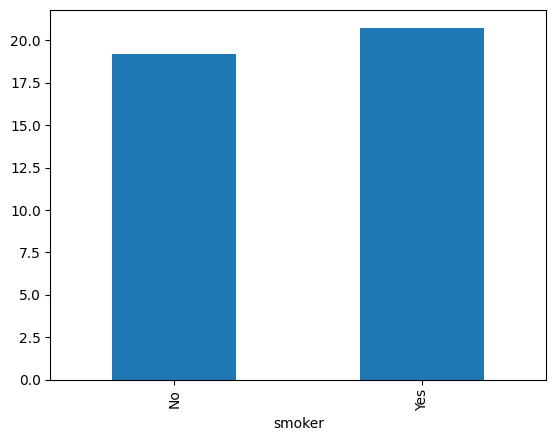

In [23]:
#Total bill distribution between Smoker & Non-Smoker
df.groupby('smoker')['total_bill'].mean().plot(kind='bar')

<Axes: xlabel='day'>

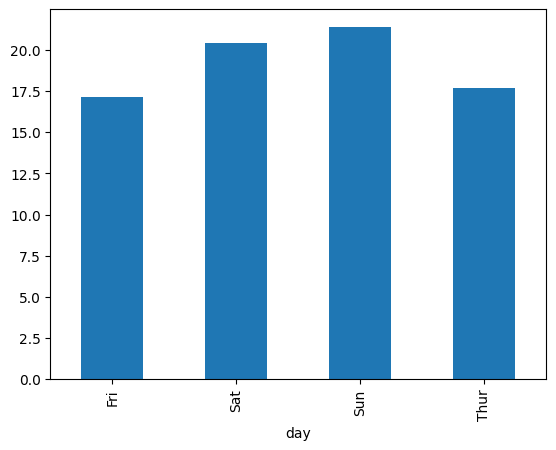

In [24]:
#Total bill distribution amoung Days

df.groupby('day')['total_bill'].mean().plot(kind='bar')

<Axes: xlabel='time'>

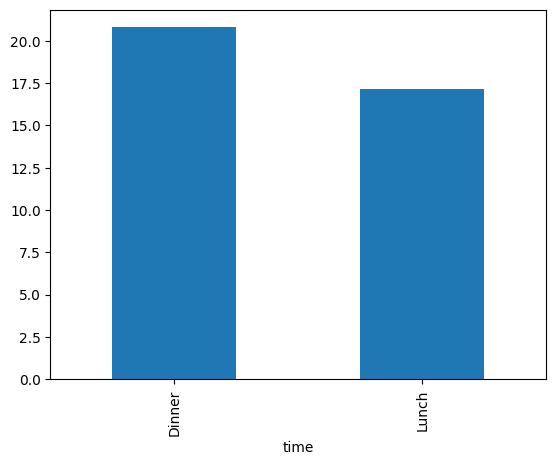

In [25]:
#Total bill distribution between Time
df.groupby('time')['total_bill'].mean().plot(kind='bar')

In [26]:
male_tips =  df[df["sex"] == "Male"]
female_tips = df[df["sex"] == "Female"]

In [27]:
avg_tip_male = male_tips["tip"].mean()
avg_tip_female = female_tips["tip"].mean()

In [28]:
print(f"Average tip for male customers: ${avg_tip_male:.2f}")
print(f"Average tip for female customers:${avg_tip_female:.2f}")

Average tip for male customers: $3.09
Average tip for female customers:$2.83


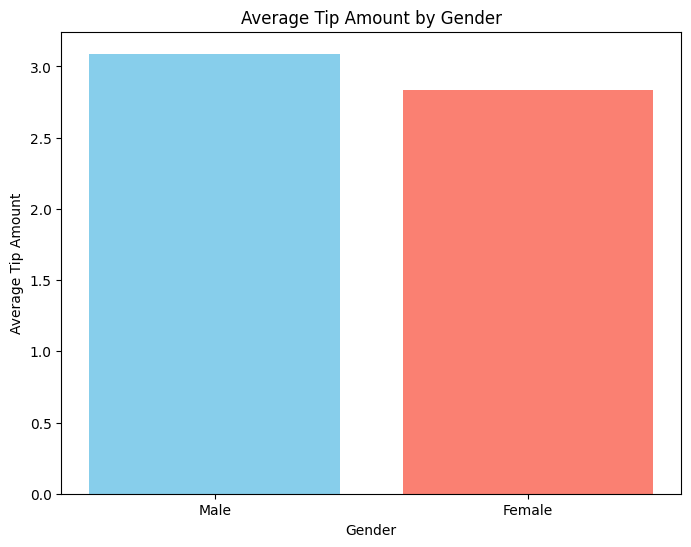

In [29]:
plt.figure(figsize=(8, 6))
plt.bar(["Male", "Female"], [avg_tip_male, avg_tip_female], color=["skyblue", "salmon"])
plt.xlabel("Gender")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount by Gender")
plt.show()

- The chart visually compares the average tip amounts between male and female customers.
- Male customers tend to give slightly higher tips (sky blue bar).
- Female customers tend to give slightly lower tips (salmon bar).
- Gender might play a role in tipping behavior, but the difference appears to be relatively small.

In [30]:
avg_tips_by_day = df.groupby("day")["tip"].mean()

In [31]:
avg_tips_by_day

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

C:\Users\aparn\AppData\Local\Temp\ipykernel_24808\837576032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tips_by_day.index,y=avg_tips_by_day.values,palette="coolwarm")


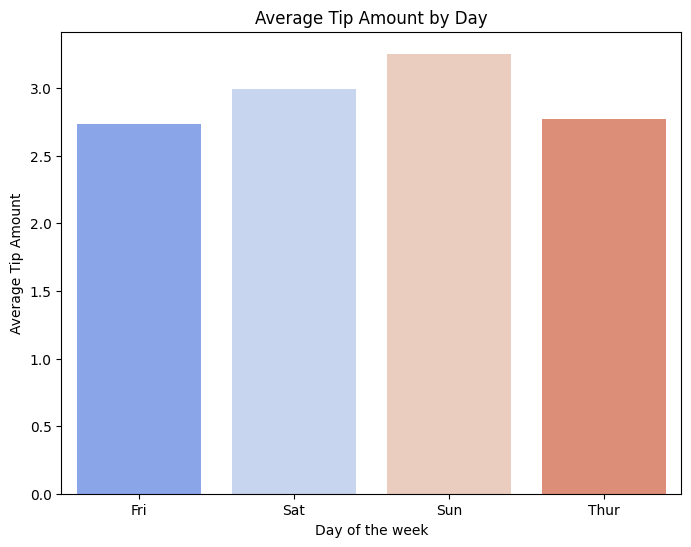

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=avg_tips_by_day.index,y=avg_tips_by_day.values,palette="coolwarm")
plt.xlabel("Day of the week")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount by Day")
plt.show()

- Each bar represents the average tip amount for a specific day of the week.
- If the bars for Saturday and Sunday are higher,it confirms that weekends indeed have higher tip frequencies.

In [33]:
smokers = df[df["smoker"] == "Yes"]
non_smokers = df[df["smoker"] == "No"]

In [34]:
avg_tip_smokers = smokers["tip"].mean()
avg_tip_non_smokers = non_smokers["tip"].mean()

In [35]:
print(f"Average tip for smokers: ${avg_tip_smokers:.2f}")
print(f"Average tip for non-smokers: ${avg_tip_non_smokers:.2f}")

Average tip for smokers: $3.01
Average tip for non-smokers: $2.99


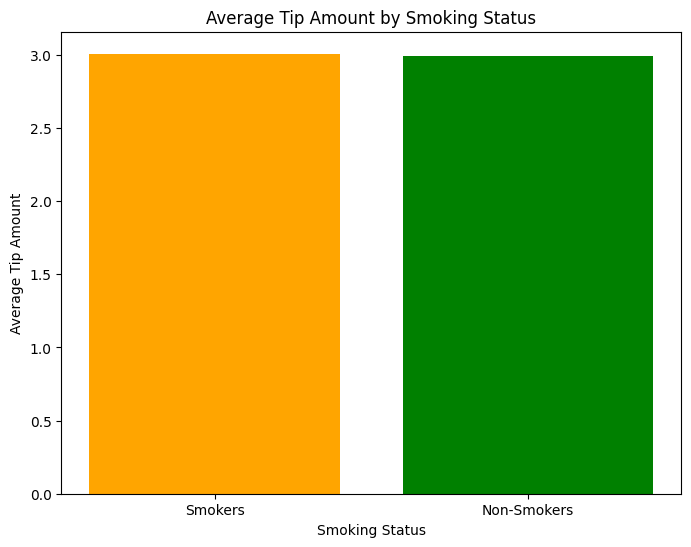

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(["Smokers", "Non-Smokers"], [avg_tip_smokers, avg_tip_non_smokers], color=["orange", "green"])
plt.xlabel("Smoking Status")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount by Smoking Status")
plt.show()

- The graph compares the average tip amount between smokers and non smokers.
- Smokers tend to give slightly higher tips than non-smokers.

<Axes: xlabel='size', ylabel='tip'>

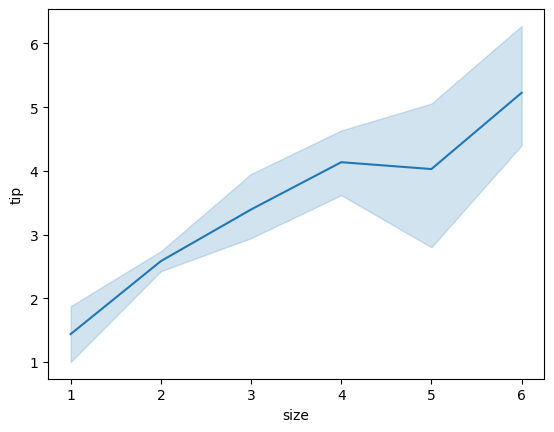

In [37]:
sns.lineplot(data=df,x="size",y='tip')

- The graph suggests that moderate-sized parties (around 4 people) tend to leave the highest tips.
- Smaller parties (1-2 people) may give lower tips, while very large parties (6 people) also show a slight dip in tip amounts.

# Multivariate Analysis

<Axes: xlabel='total_bill', ylabel='tip'>

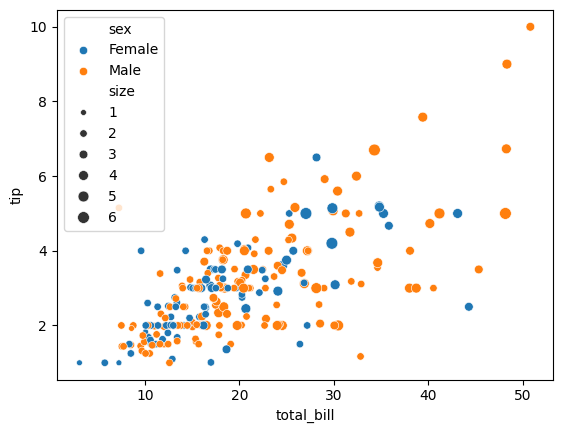

In [38]:
#Plotting the scatter plot of Total_bill, tip and sex
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

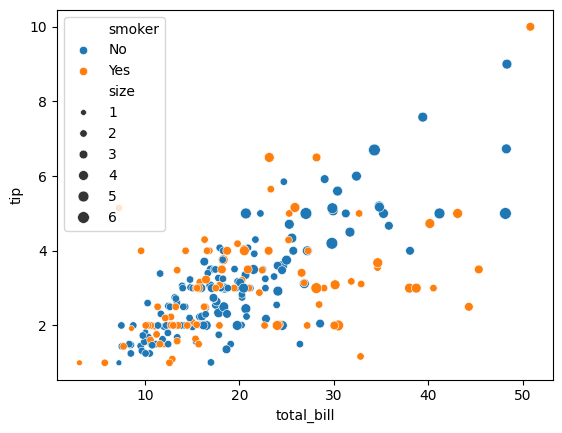

In [39]:
#Plotting the scatter plot of Total_bill, tip and smoker
sns.scatterplot(data=df, x='total_bill', y='tip',size='size',hue='smoker')

<Axes: xlabel='total_bill', ylabel='tip'>

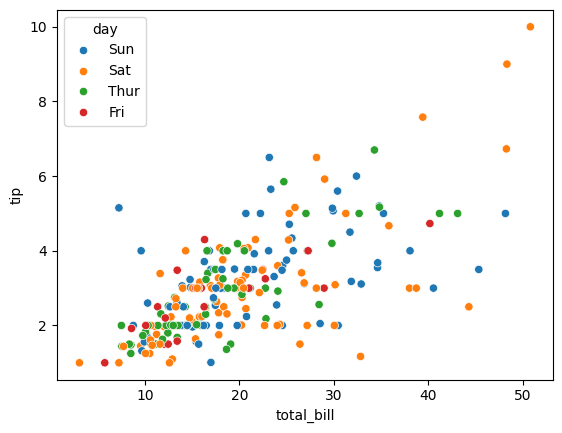

In [40]:
#Plotting the scatter plot of Total_bill, tip and day
sns.scatterplot(data=df, x='total_bill',y='tip', hue='day')

<Axes: xlabel='total_bill', ylabel='tip'>

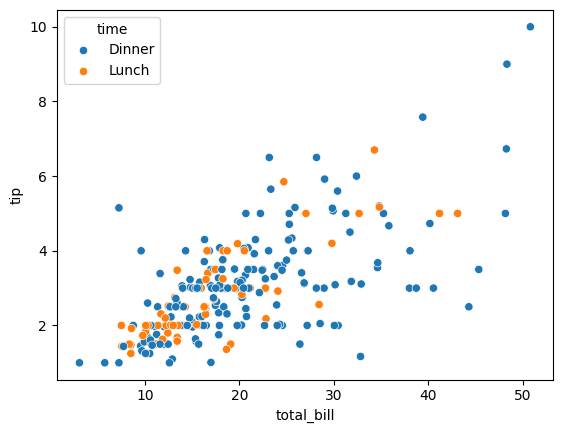

In [41]:
#Plotting the scatter plot of Total_bill, tip and time
sns.scatterplot(data=df,x='total_bill',y='tip',hue='time')

<Axes: xlabel='day', ylabel='tip'>

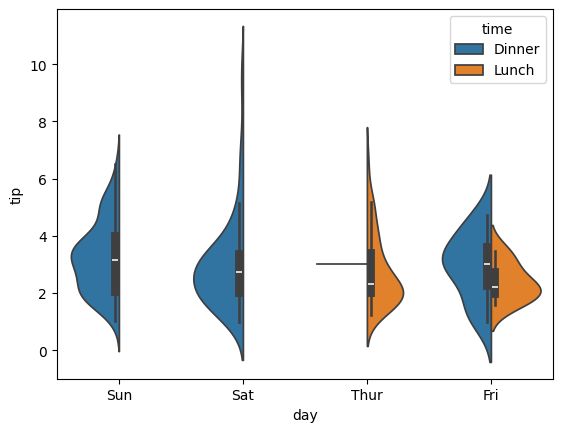

In [42]:
sns.violinplot(x='day',y='tip',hue='time',data=df, split=True)

- The plot compares the distribution of tips received during lunch and dinner service.
- The blue violin represents tips during lunch, and the orange violin represents tips during dinner.
- The white dot within each violin represents the median tip amount for that category.For both lunch and dinner, the median tip amount appears to be around 2.5 to 3.
- The width of each violin indicates the density of tip amounts at different levels.
Wider sections suggest higher frequency of tips at those amounts.
For dinner, there’s a wider section around the median, indicating more tips in that range

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# Data Preprocessing

In [44]:
df.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [45]:
df.size

1708

In [46]:
# Split the data into X and y
X = df[['total_bill','size','sex','smoker','day','time']]
y = df['tip']


In [47]:
num_col = ['total_bill','size']

# Feature Preprocessing

# Train Test Split

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

## OneHotEncoding

In [49]:
ohe = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False)

In [50]:
ohe.fit(X_train[['time']])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [51]:
X_train[['time']]

,time
135,Lunch
149,Lunch
124,Lunch
29,Dinner
231,Dinner
...,...
3,Dinner
130,Lunch
134,Lunch
155,Dinner


In [52]:
X_train_ohe = pd.DataFrame(data=ohe.transform(X_train[['time']]),columns=ohe.get_feature_names_out())

In [53]:
X_test_ohe = pd.DataFrame(data=ohe.transform(X_test[['time']]),columns=ohe.get_feature_names_out())

In [54]:
X_train_pr = pd.concat([X_train[num_col].reset_index(drop=True),X_train_ohe],axis=1)

In [55]:
X_test_pr = pd.concat([X_test[num_col].reset_index(drop=True),X_train_ohe],axis=1)

## Label encoding

In [56]:
X_train

,total_bill,size,sex,smoker,day,time
135,8.51,2,Female,No,Thur,Lunch
149,7.51,2,Male,No,Thur,Lunch
124,12.48,2,Female,No,Thur,Lunch
29,19.65,2,Female,No,Sat,Dinner
231,15.69,3,Male,Yes,Sat,Dinner
...,...,...,...,...,...,...
3,23.68,2,Male,No,Sun,Dinner
130,19.08,2,Male,No,Thur,Lunch
134,18.26,2,Female,No,Thur,Lunch
155,29.85,5,Female,No,Sun,Dinner


In [57]:
sex_le = LabelEncoder().fit(X_train['sex'])
smoker_le = LabelEncoder().fit(X_train['smoker'])
day_le = LabelEncoder().fit(X_train['day'])

In [58]:
X_train['sex'] = sex_le.transform(X_train['sex'])
X_train['smoker'] = smoker_le.transform(X_train['smoker'])
X_train['day'] = day_le.transform(X_train['day'])

In [59]:
X_test['sex'] = sex_le.transform(X_test['sex'])
X_test['smoker'] = smoker_le.transform(X_test['smoker'])
X_test['day'] = day_le.transform(X_test['day'])

## Standard Scaling

In [60]:
sc = StandardScaler()

In [61]:
sc.fit(X_train[num_col])

StandardScaler()

In [62]:
sc.transform(X_train[num_col])

array([[-1.2437483 , -0.58376761],
       [-1.35649517, -0.58376761],
       [-0.79614323, -0.58376761],
       [ 0.01225183, -0.58376761],
       [-0.43422578,  0.48010794],
       [-1.038549  ,  0.48010794],
       [-0.69016117, -0.58376761],
       [-0.36432272,  0.48010794],
       [-0.00578767, -0.58376761],
       [-1.03742153,  0.48010794],
       [ 0.56471149,  1.54398348],
       [ 0.84657866,  3.67173457],
       [-1.04305887, -0.58376761],
       [-0.23466382, -0.58376761],
       [-0.73413245, -0.58376761],
       [-0.7826136 , -0.58376761],
       [-0.83222223, -0.58376761],
       [ 0.49706337, -0.58376761],
       [-0.35079309, -0.58376761],
       [-0.894233  , -0.58376761],
       [-0.30682181, -0.58376761],
       [ 1.70119993, -0.58376761],
       [ 3.24583204,  1.54398348],
       [-1.038549  , -0.58376761],
       [ 0.86349069,  1.54398348],
       [ 1.00329681, -0.58376761],
       [ 0.64814417,  1.54398348],
       [ 2.90984637,  0.48010794],
       [ 1.7237493 ,

In [63]:
X_train_sc = pd.DataFrame(data=sc.transform(X_train[num_col]),columns=num_col)

In [64]:
X_test_sc = pd.DataFrame(data=sc.transform(X_test[num_col]),columns=num_col)

In [65]:
X_train

,total_bill,size,sex,smoker,day,time
135,8.51,2,0,0,3,Lunch
149,7.51,2,1,0,3,Lunch
124,12.48,2,0,0,3,Lunch
29,19.65,2,0,0,1,Dinner
231,15.69,3,1,1,1,Dinner
...,...,...,...,...,...,...
3,23.68,2,1,0,2,Dinner
130,19.08,2,1,0,3,Lunch
134,18.26,2,0,0,3,Lunch
155,29.85,5,0,0,2,Dinner


In [66]:
X_train_final = pd.concat([X_train_sc, X_train[['sex', 'smoker', 'day']].reset_index(drop=True), X_train_ohe], axis=1)

In [67]:
X_test_final = pd.concat([X_test_sc, X_test[['sex', 'smoker', 'day']].reset_index(drop=True), X_test_ohe], axis=1)

In [68]:
X_train_final

,total_bill,size,sex,smoker,day,time_Lunch
0,-1.243748,-0.583768,0,0,3,1.0
1,-1.356495,-0.583768,1,0,3,1.0
2,-0.796143,-0.583768,0,0,3,1.0
3,0.012252,-0.583768,0,0,1,0.0
4,-0.434226,0.480108,1,1,1,0.0
...,...,...,...,...,...,...
190,0.466622,-0.583768,1,0,2,0.0
191,-0.052014,-0.583768,1,0,3,1.0
192,-0.144466,-0.583768,0,0,3,1.0
193,1.162270,2.607859,0,0,2,0.0


# Linear Regression

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train_final, y_train)

LinearRegression()

In [71]:
y_pred_train = model.predict(X_train_final)

In [72]:
y_pred_test = model.predict(X_test_final)

In [73]:
mae = mean_absolute_error(y_test, y_pred_test)

In [74]:
mse = mean_squared_error(y_test, y_pred_test)

In [75]:
r2 = r2_score(y_test, y_pred_test)

In [76]:
print(f"MAE: {mae:.2f}, \nMSE: {mse:.2f}, \nR^2: {r2:.2f}")

MAE: 0.72, 
MSE: 1.00, 
R^2: 0.47


## Hyperparameter Tuning for Ridge Regression in a Linear Model

In [77]:
# Initialize Ridge regression model
ridge = Ridge()

In [78]:
# Define hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]} 

In [79]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [80]:
# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha:.4f}")

Best alpha for Ridge: 10.0000


In [81]:
# Retrain the model with the best alpha
model_tuned = Ridge(alpha=best_alpha)
model_tuned.fit(X_train_final, y_train)

Ridge(alpha=10.0)

In [82]:
# Make predictions on the test set
y_pred_test_tuned = model_tuned.predict(X_test_final)

In [83]:
# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_test_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_test_tuned)
r2_tuned = r2_score(y_test, y_pred_test_tuned)

In [84]:
print(f"Tuned Model Results:")
print(f"MAE: {mae_tuned:.2f}, MSE: {mse_tuned:.2f}, R^2: {r2_tuned:.2f}")


Tuned Model Results:
MAE: 0.72, MSE: 0.99, R^2: 0.48


- With an MAE of 0.72, model’s predictions deviate from the true values by approximately 0.72 units.
- An MSE of 0.99 suggests that, on average, model’s predictions deviate from the true values by approximately 0.99 units.
- An (R^2) score of 0.48 means that the model captures about 48% of the variance in the test data.
- Overall, Ridge regression model with tuned hyperparameters performs reasonably well.
- The MAE and MSE are relatively low, indicating that the model’s predictions are close to the actual values.
- While the model explains a significant portion of the variance (as indicated by an (R^2) score of 0.48), there remains room for improvement.

# KNeighborsRegressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)


In [87]:
neigh.fit(X_train_final, y_train)


KNeighborsRegressor(n_neighbors=2)

In [88]:
y_pred_train = neigh.predict(X_train_final)

In [89]:
y_pred_test = neigh.predict(X_test_final)

### Evaluation

In [90]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [91]:
mse_train

0.5391465384615385

In [92]:
mse_test

1.2027479591836734

In [93]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [94]:
mae_train 

0.4922820512820513

In [95]:
mae_test

0.8267346938775509

In [96]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [97]:
r2_train

0.7170793218552802

In [98]:
r2_test 

0.3650715736232797

## Hyperparameter Tuning for KNN Regression using Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Define hyperparameters to search
param_grid = {'n_neighbors': [1, 3, 5, 7]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_final, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']


In [100]:
y_pred_test = grid_search.predict(X_test_final)

In [101]:
mse_test = mean_squared_error(y_test, y_pred_test)

In [102]:
mse_test

0.9997567263640148

In [103]:
mae_test = mean_absolute_error(y_test, y_pred_test)

In [104]:
mae_test

0.7235276967930029

In [105]:
r2_test = r2_score(y_test, y_pred_test)

In [106]:
r2_test

0.4722302705375798

- Initial Model (Before Hyperparameter Tuning):
MSE: 1.2, MAE: 0.82, R^2 Score: 0.3
- The initial KNN model had moderate performance, but there was room for improvement.
- Tuned Model (After Hyperparameter Tuning):
MSE: 0.99, MAE: 0.72,R^2 Score: 0.472
- The hyperparameter tuning process led to better results, reducing errors and capturing more variance in the test data.
